<a href="https://colab.research.google.com/github/iryna-kovalenko/unFakeIt/blob/main/Capstone_using_labed_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preprocessing

In [ ]:
#Labels are binary 1 is real and 0 is Fake 

#practicing regilar expressions 
import re
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize as st, word_tokenize as wt
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
from nltk.corpus import stopwords
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#---------------------Using cropped data-------------------------------
basiccsv=pd.read_csv('fake_or_real_news.csv')
data_split=np.random.rand(len(basiccsv))<0.50# take true/false table to split the data, all true will go traiting , all false will fo testing data
df_with_links=basiccsv[~data_split]
print(df_with_links)
#---------------------Using cropped data-------------------------------

#df_testing=pd.read_csv('capstone_file.csv')
print('first')
print(df_with_links['label'].value_counts())

#PREPROCESSING 
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
# method to remove URL's, @ and # from the text
def remove_urls_at_hash(new_list,data_column):
    for t in data_column:
        newT=re.sub('http://\S+|https://\S+','',t) #removing http/https
        no_at=re.sub('@\S+|#\S+|\n|RT|rt','',newT) # removing @,#,\n,rt
        if newT!=no_at : 
            newT=no_at
        if t==newT:
            new_list.append(t)
        elif t!=newT:
            new_list.append(newT)
        
 
#method to remove 1)punctuation 2)stop_words           
def text_cleaning(txt):
    cleaned_tweets=[] #list
    def hasNumbers(inputString):
      return any(char.isdigit() for char in inputString)
    no_dig_tweets=[]  
    temp_no_dig_tweets=[] 
    for tw_1 in txt:
      for this_word in tw_1.split():
        if not hasNumbers(this_word):
          temp_no_dig_tweets.append(this_word.lower())
        word=" ".join(temp_no_dig_tweets)
      no_dig_tweets.append(word)
      temp_no_dig_tweets=[]

    for tweet in no_dig_tweets:
        text_remove_punt=[char for char in tweet if char not in string.punctuation] #in char is not in punctuation list then return
        text_gather_chars_into_words=''.join(text_remove_punt).split()#make 1 long string and split into words
        text_remove_stop_words=[w for w in text_gather_chars_into_words if w.lower() not in stop_words] #if word not in list then  return 
        cleaned_tweets.append(text_remove_stop_words)
    return cleaned_tweets

# method to remove duplicate tweets 
def remove_duplicates(df_for_removing_duplicates):
    no_dub=pd.DataFrame.drop_duplicates(df_for_removing_duplicates)
    return no_dub

#METHOD CALLS
no_duplicates=remove_duplicates(df_with_links)
print('no dublicates first one ')
print(no_duplicates['label'].value_counts())

rem=[]   #list
remove_urls_at_hash(new_list=rem,data_column=no_duplicates['text'])
clean_data=text_cleaning(rem) # removing punctuation, stop words

#to make a from a nested list regular list
clean_data_list=[]
for ii in clean_data:
    clean_data_list.append(' '.join(ii))
print('len of the clean data after all pre processing is :')
print(len(clean_data_list))

final_clean_df=pd.DataFrame(clean_data_list) # casting into Data Frame, so we can use it for vectorization
final_clean_set=list(final_clean_df[0])

#TESTING --> comparison between original tweet and tweet after preprocessing 
#print(final_clean_df[5:10])
#print('-----------------')
#print(no_duplicates['text'][5:10])

#Beg of Words using CountVectorizer from sklearn


vectorizer=CountVectorizer()
x=vectorizer.fit_transform(final_clean_set)#get vocab then build vector then make an array
features_extracted=vectorizer.vocabulary_
#print(features_extracted) # gives the vocablulary list
print('training data shape is')
print(x.shape) # representation of (tweet number, voablulary list)

# i need list [] --> pu labels in the list 
future_label=[]
for r in no_duplicates['label']:
  future_label.append(r)
print(future_label)
# NEXT STEP IS TO ADD LABELING TO OUR DATASET
# 1.1 after vectorization we have as a result a matrix
matrix_to_array=x.toarray() #1.2 make matrix to array
array_to_df=pd.DataFrame(matrix_to_array)# an array to dataframe
array_to_df['label']=future_label # now append label to the df
print(array_to_df.shape)
print(array_to_df['label'].value_counts())
#print(df_no_duplicate)
#print(rem)
#use collection import counter to see what words are mostly used to identofi stopwords

print('finally  ')
print(array_to_df['label'].value_counts())
#--------------------------------vectorizing clean testing data----------------------------------


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


                                                   text  ... Unnamed: 138
0     Daniel Greenfield, a Shillman Journalism Fello...  ...          NaN
4     Share This Baylee Luciani (left), Screenshot o...  ...          NaN
8     0 \nHillary Clinton has barely just lost the p...  ...          NaN
9     November 13, 2016 By 21wire Leave a Comment \n...  ...          NaN
10    Mises.org November 1, 2016 Inferno is a great ...  ...          NaN
...                                                 ...  ...          ...
6304  (CNN) ISIS has claimed responsibility for the ...  ...          NaN
6306  Police in Charleston, S.C., say a man they sus...  ...          NaN
6309  ROME —  U.S. Democratic presidential candidate...  ...          NaN
6311  The freshman senator from Georgia quoted scrip...  ...          NaN
6314  Jeb Bush Is Suddenly Attacking Trump. Here's W...  ...          NaN

[3172 rows x 139 columns]
first
REAL    1592
FAKE    1580
Name: label, dtype: int64
[nltk_data] Downloading pac

Splitting the data

In [ ]:
# DEVIDE INTO TRAINING AND TESTING SET 
data_split=np.random.rand(len(array_to_df))<0.80# take true/false table to split the data, all true will go traiting , all false will fo testing data
train=array_to_df[data_split] # training set based on randomly selested values 80%
test=array_to_df[~data_split] # testing set based on 20% randomly seleted values
print(' Size of training set : ', len(train))
print(' Size of testing set : ', len(test))

# split into independednt and dependednt value for training
leng=len(train.axes[1])-1
x_train=train.iloc[:,0:leng]
y_train=train.iloc[:,leng]

# split into independednt and dependednt value for testing
x_test=test.iloc[:,0:leng]
y_test=test.iloc[:,leng]

print(array_to_df['label'].value_counts())

 Size of training set :  2424
 Size of testing set :  611
FAKE    1536
REAL    1499
Name: label, dtype: int64


**K nearest neighbor** (finding the best K)

 using matching metric is  0.5593667546174143
 using matching metric is  0.5118733509234829
 using matching metric is  0.5277044854881267
 using matching metric is  0.49604221635883905
 using matching metric is  0.5356200527704486
 using matching metric is  0.5065963060686016
 using matching metric is  0.5778364116094987
 using matching metric is  0.5593667546174143
 using matching metric is  0.6121372031662269


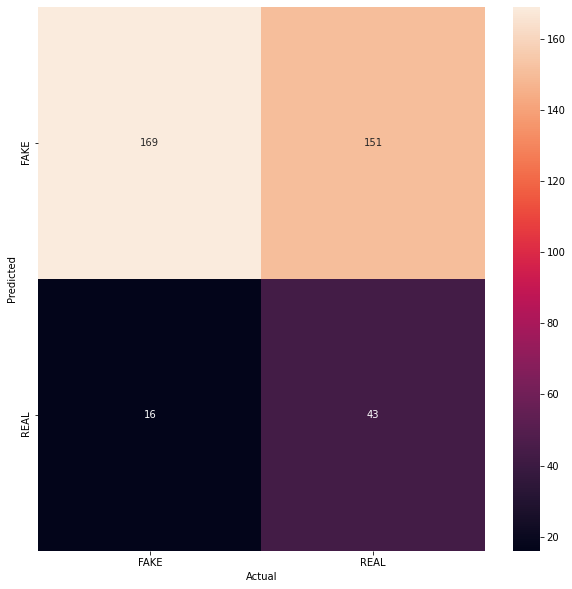

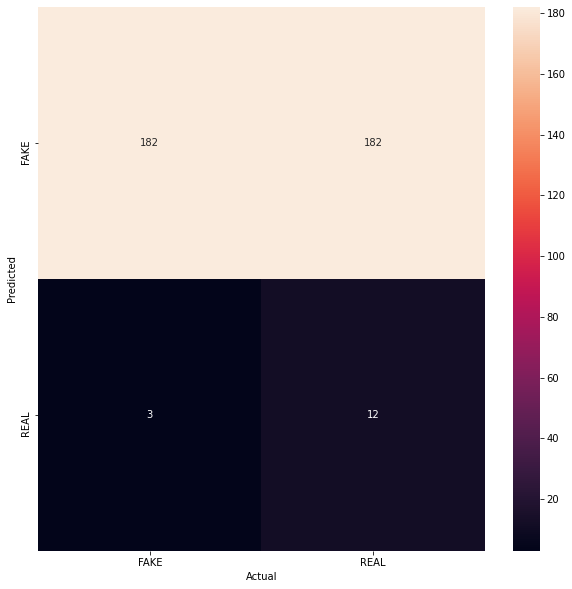

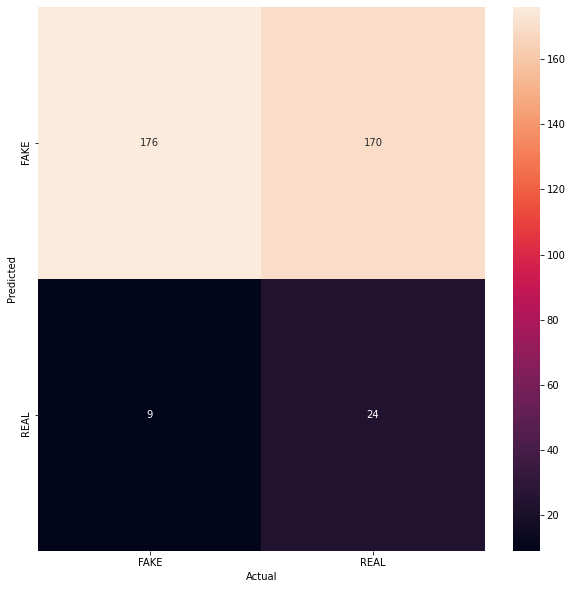

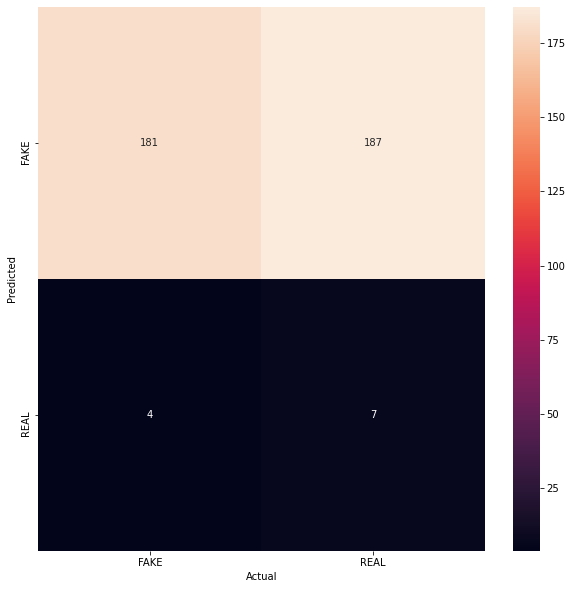

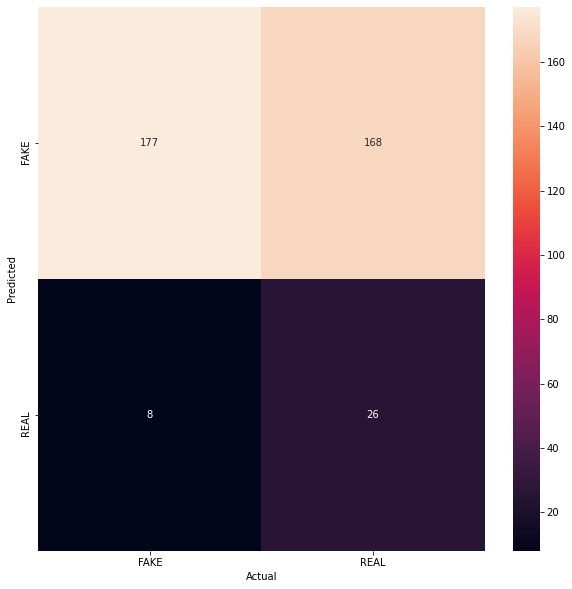

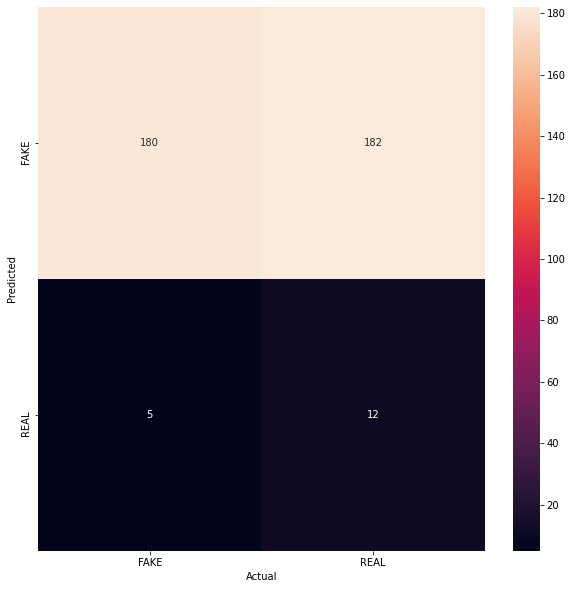

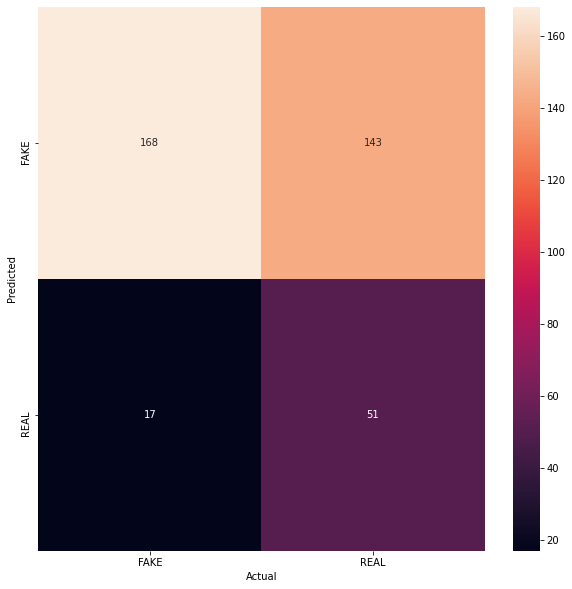

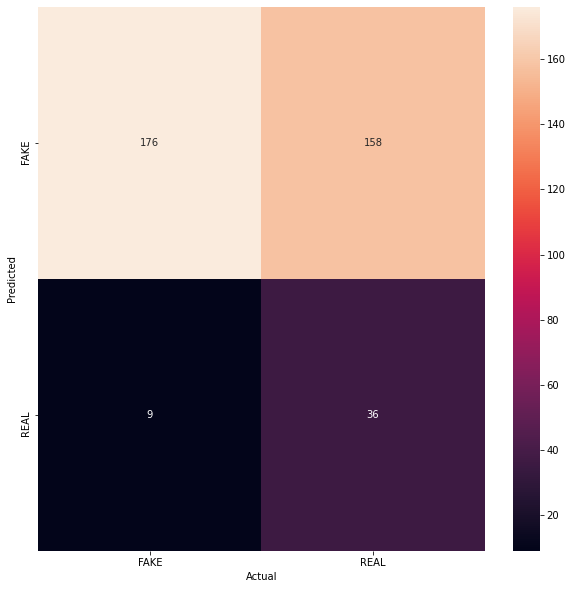

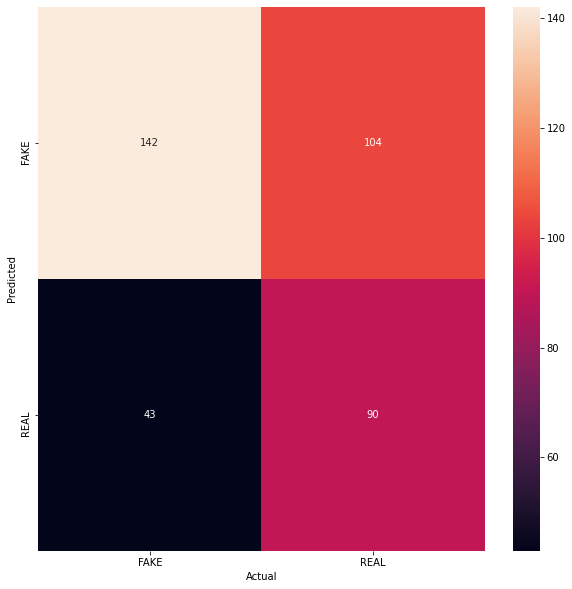

In [ ]:
#KNeighborsClassifier for binary data
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
#original testing data
#k=1 -->52%
#k=2 -->47% 
#k=3 -->54%
#k=4 --> 54%
#k=5 --> 54%
#new testing data KNeighborsClassifier
#k=1,0.6353779429987608
#k=2,0.45322180916976457
#k=3,0.7022924411400248
#k=4,0.5111524163568774
#k=5,0.7351301115241635
#k=6,0.6071871127633209
#k=7,0.8116480793060719--> wow xD
#k=8,0.7214993804213135
Ks = 10
for n in range(1,Ks):
  model_one = KNeighborsClassifier(n_neighbors = n ,metric='matching',).fit(x_train,y_train)
  yhat=model_one.predict(x_test) 
  print(" using matching metric is ",metrics.accuracy_score(y_test, yhat)) 

  cm = pd.crosstab(yhat,y_test,rownames=['Predicted'], colnames=['Actual'])
  plt.figure(figsize = (10, 10))
  sns.heatmap(cm, annot = True,fmt='d')

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.5, solver='saga',multi_class='multinomial',class_weight='balanced',max_iter=200).fit(x_train,y_train)
yhat=LR.predict(x_test)
print('metrics.accuracy_score : ',metrics.accuracy_score(y_test,yhat ))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


metrics.accuracy_score :  0.6251548946716233


In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='saga',multi_class='multinomial',max_iter=200).fit(x_train,y_train)
yhat=LR.predict(x_test)
print('metrics.accuracy_score : ',metrics.accuracy_score(y_test,yhat ))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


metrics.accuracy_score :  0.5080428954423593


In [ ]:
print(df_no_duplicate)

                                                      0
0     washingtonspring tx reuters united states make...
1     nazis see donald trump pathway back power join...
2     washington reuters us president donald trump t...
3     washington reuters us president donald trump s...
4     new york times published piece displaying peop...
...                                                 ...
3735  washington reuters top white house officials m...
3736  washington reuters us defense secretary jim ma...
3737  donald trump recently gave speech american leg...
3738  recently intelligence agencies including fbi f...
3739  paul lepage might well maine version donald tr...

[3740 rows x 1 columns]


ComplementNB accuracy_score :  0.5415549597855228


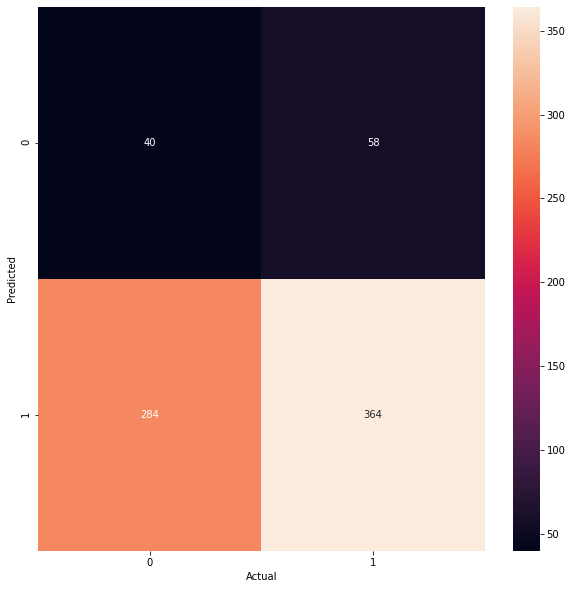

In [ ]:
from sklearn.naive_bayes import ComplementNB
model_ComplementNB = ComplementNB(norm="True").fit(x_train, y_train)
yhat = model_ComplementNB.predict(x_test)
print('ComplementNB accuracy_score : ',metrics.accuracy_score(y_test, yhat))

cm = pd.crosstab(yhat,y_test,rownames=['Predicted'], colnames=['Actual'])
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True,fmt='d')

In [ ]:
from sklearn.naive_bayes import GaussianNB

model_GaussianNB = GaussianNB().fit(x_train, y_train)
yhat = model_GaussianNB.predict(x_test)
print('GaussianNB accuracy_score : ',metrics.accuracy_score(y_test, yhat))


GaussianNB accuracy_score :  0.5053619302949062


testing shit

In [ ]:
basiccsv=pd.read_csv('fake_or_real_news.csv')
data_split=np.random.rand(len(basiccsv))<0.70# take true/false table to split the data, all true will go traiting , all false will fo testing data
df_with_links=basiccsv[~data_split]
no_dub=pd.DataFrame.drop_duplicates(df_with_links)
print(no_dub['label'].value_counts())



FAKE    967
REAL    955
Name: label, dtype: int64


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#print(final_clean_df[0])
final_clean_set=set(final_clean_df[0])
print('----------------------')
print(final_clean_set)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#print(array_to_df['label'])
print('----------------------')
print('----------------------')
print('----------------------')
print('----------------------')
print('----------------------')
print('----------------------')
print(no_duplicates['label'])

#print(no_duplicates['text'])
print(len((no_duplicates['label']).to_string(index=False)))
print(len((no_duplicates['text']).to_string(index=False)))
'''
new_df_fuck=[]
array_to_df
new_df_fuck['text']=(no_duplicates['text'].to_string(index=False))
print(new_df_fuck)

array_to_df=pd.DataFrame(matrix_to_array)# an array to dataframe
array_to_df['label']=no_duplicates['label']
'''
# i need list []
future_label=[]
for r in no_duplicates['label']:
  future_label.append(r)
print(len(no_duplicates['label']))
print(len(future_label))

print(len(no_duplicates['text']))
print(len(no_duplicates['label']))

----------------------
----------------------
----------------------
----------------------
----------------------
----------------------
4       FAKE
6       FAKE
12      FAKE
13      FAKE
19      FAKE
        ... 
6307    REAL
6308    REAL
6309    REAL
6313    REAL
6314    REAL
Name: label, Length: 1828, dtype: object
10967
93227
1828
1828
1828
1828


PassiveAggressiveClassifier 0.8854337152209493
DecisionTreeClassifier 0.7643207855973814
RandomForestClassifier 0.8363338788870703
RandomForestClassifier 0.8690671031096563


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression 0.8919803600654664
              precision    recall  f1-score   support

        FAKE       0.88      0.90      0.89       304
        REAL       0.90      0.88      0.89       307

    accuracy                           0.89       611
   macro avg       0.89      0.89      0.89       611
weighted avg       0.89      0.89      0.89       611



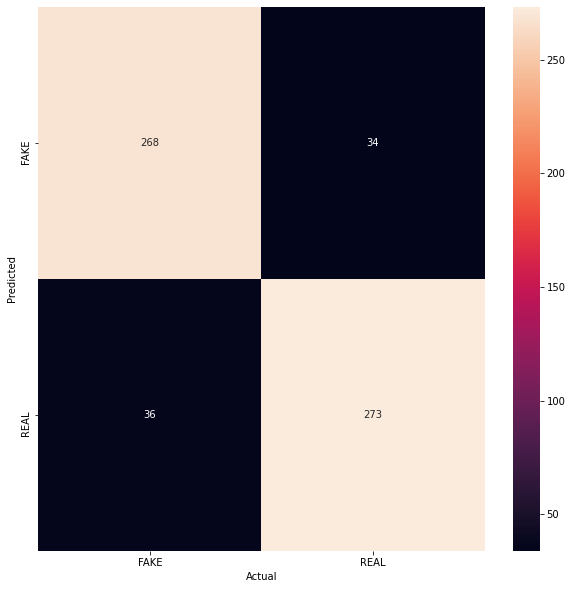

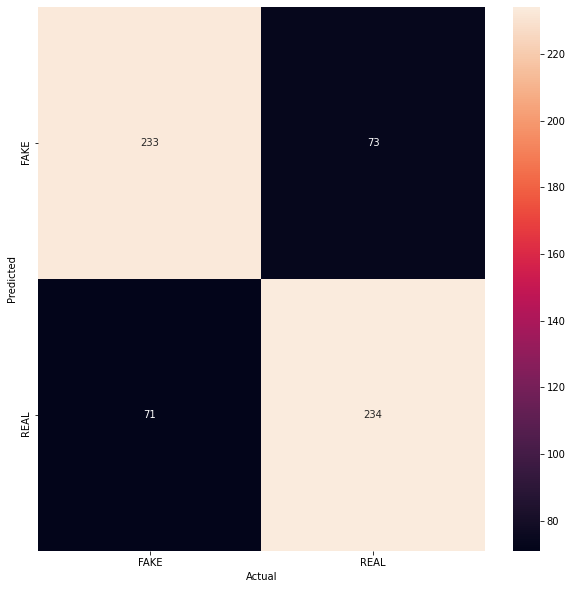

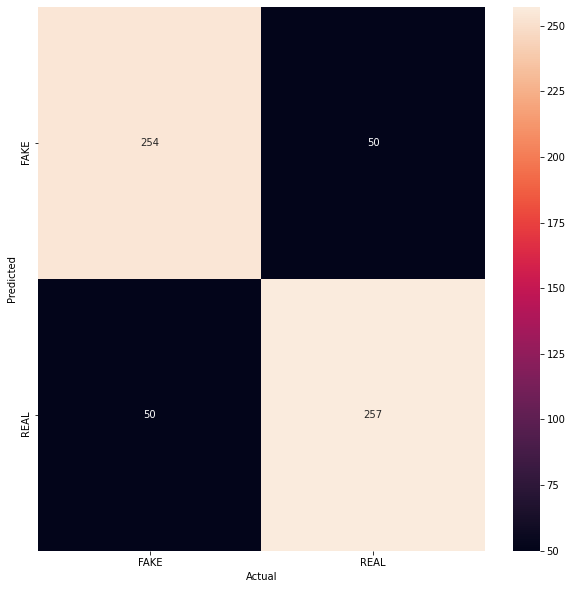

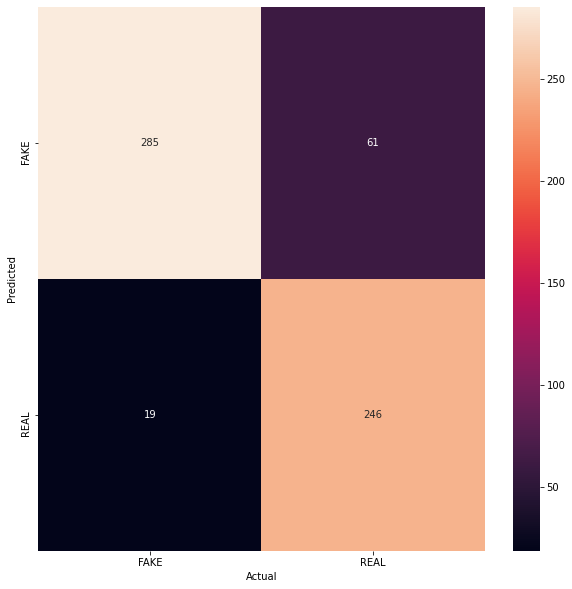

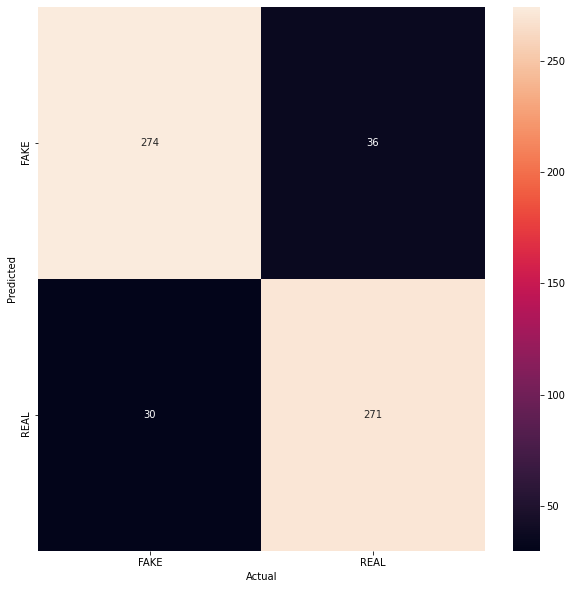

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from collections import Counter
from nltk.tokenize import word_tokenize
from sklearn.metrics import classification_report

model1=PassiveAggressiveClassifier(max_iter=300)
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
acc1=accuracy_score(y_test,y_pred1)
print('PassiveAggressiveClassifier',acc1)

cm = pd.crosstab(y_pred1,y_test,rownames=['Predicted'], colnames=['Actual'])
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True,fmt='d')

model3=DecisionTreeClassifier()
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
acc3=accuracy_score(y_test,y_pred3)
print('DecisionTreeClassifier',acc3)

cm = pd.crosstab(y_pred3,y_test,rownames=['Predicted'], colnames=['Actual'])
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True,fmt='d')

model4=RandomForestClassifier()
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)
acc4=accuracy_score(y_test,y_pred4)
print('RandomForestClassifier',acc4)

cm = pd.crosstab(y_pred4,y_test,rownames=['Predicted'], colnames=['Actual'])
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True,fmt='d')

model5=SVC()
model5.fit(x_train,y_train)
y_pred5=model5.predict(x_test)
acc5=accuracy_score(y_test,y_pred5)
print('RandomForestClassifier',acc5)

cm = pd.crosstab(y_pred5,y_test,rownames=['Predicted'], colnames=['Actual'])
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True,fmt='d')

model6=LogisticRegression()
model6.fit(x_train,y_train)
y_pred6=model6.predict(x_test)
acc6=accuracy_score(y_test,y_pred6)
print('LogisticRegression',acc6)

cm = pd.crosstab(y_pred6,y_test,rownames=['Predicted'], colnames=['Actual'])
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True,fmt='d')
print(classification_report(y_test,y_pred6))




In [ ]:
#Labels are binary 1 is real and 0 is Fake 

#practicing regilar expressions 
import re
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize as st, word_tokenize as wt
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
from nltk.corpus import stopwords
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#---------------------Using cropped data-------------------------------
basiccsv=pd.read_csv('mini_news.csv')
data_split=np.random.rand(len(basiccsv))<0.70# take true/false table to split the data, all true will go traiting , all false will fo testing data
df_with_links=basiccsv[data_split]
print(df_with_links)
#---------------------Using cropped data-------------------------------
#PREPROCESSING 
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
# method to remove URL's, @ and # from the text
def remove_urls_at_hash(new_list,data_column):
    for t in data_column:
        newT=re.sub('http://\S+|https://\S+','',t) #removing http/https
        no_at=re.sub('@\S+|#\S+|\n|RT|rt','',newT) # removing @,#,\n,rt
        if newT!=no_at : 
            newT=no_at
        if t==newT:
            new_list.append(t)
        elif t!=newT:
            new_list.append(newT)
        
 
#method to remove 1)punctuation 2)stop_words           
def text_cleaning(txt):
    cleaned_tweets=[] #list
    def hasNumbers(inputString):
      return any(char.isdigit() for char in inputString)
    no_dig_tweets=[]  
    temp_no_dig_tweets=[] 
    for tw_1 in txt:
      for this_word in tw_1.split():
        if not hasNumbers(this_word):
          temp_no_dig_tweets.append(this_word.lower())
        word=" ".join(temp_no_dig_tweets)
      no_dig_tweets.append(word)
      temp_no_dig_tweets=[]

    for tweet in no_dig_tweets:
        text_remove_punt=[char for char in tweet if char not in string.punctuation] #in char is not in punctuation list then return
        text_gather_chars_into_words=''.join(text_remove_punt).split()#make 1 long string and split into words
        text_remove_stop_words=[w for w in text_gather_chars_into_words if w.lower() not in stop_words] #if word not in list then  return 
        cleaned_tweets.append(text_remove_stop_words)
    return cleaned_tweets

# method to remove duplicate tweets 
def remove_duplicates(df_for_removing_duplicates):
    no_dub=pd.DataFrame.drop_duplicates(df_for_removing_duplicates)
    return no_dub

#METHOD CALLS
no_duplicates=remove_duplicates(df_with_links)
rem=[]   #list
remove_urls_at_hash(new_list=rem,data_column=no_duplicates['text'])
clean_data=text_cleaning(rem) # removing punctuation, stop words

#to make a from a nested list regular list
clean_data_list=[]
for ii in clean_data:
    clean_data_list.append(' '.join(ii))
print('len of the clean data after all pre processing is :')
print(len(clean_data_list))

final_clean_df=pd.DataFrame(clean_data_list) # casting into Data Frame, so we can use it for vectorization
final_clean_set=list(final_clean_df[0])

print('pretend you didnt see this below ')

vectorizer=CountVectorizer()
x=vectorizer.transform(final_clean_set)#get vocab then build vector then make an array
print('training data shape is')
print(x.shape) # representation of (tweet number, voablulary list)

# i need list [] --> pu labels in the list 
future_label=[]
for r in no_duplicates['label']:
  future_label.append(r)
print(future_label)
# NEXT STEP IS TO ADD LABELING TO OUR DATASET
# 1.1 after vectorization we have as a result a matrix
matrix_to_array=x.toarray() #1.2 make matrix to array
array_to_df=pd.DataFrame(matrix_to_array)# an array to dataframe
array_to_df['label']=future_label # now append label to the df
print(array_to_df.shape)
print(array_to_df['label'].value_counts())
#print(df_no_duplicate)
#print(rem)
#use collection import counter to see what words are mostly used to identofi stopwords

print('finally  ')
print(array_to_df['label'].value_counts())
#--------------------------------vectorizing clean testing data----------------------------------


LogisticRegression 0.8920265780730897
              precision    recall  f1-score   support

        FAKE       0.88      0.92      0.90       312
        REAL       0.91      0.87      0.89       290

    accuracy                           0.89       602
   macro avg       0.89      0.89      0.89       602
weighted avg       0.89      0.89      0.89       602



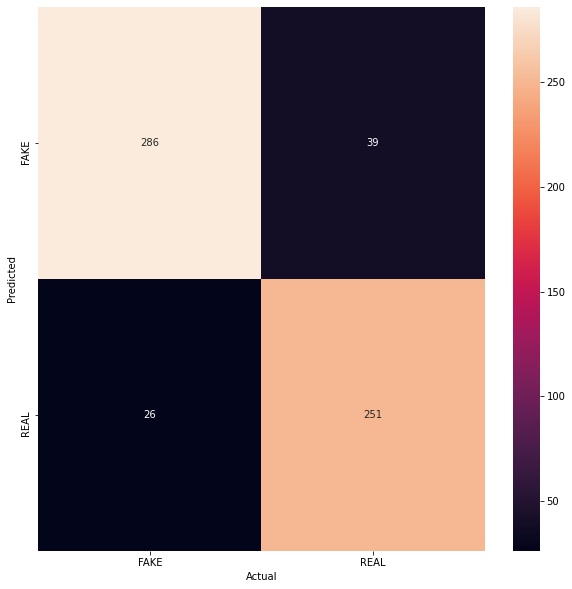

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from collections import Counter
from nltk.tokenize import word_tokenize
from sklearn.metrics import classification_report

model6=LogisticRegression()
model6.fit(x_train,y_train)
y_pred6=model6.predict(x_test)
acc6=accuracy_score(y_test,y_pred6)
print('LogisticRegression',acc6)

cm = pd.crosstab(y_pred6,y_test,rownames=['Predicted'], colnames=['Actual'])
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True,fmt='d')
print(classification_report(y_test,y_pred6))